In [6]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /Users/thomasstenner/opt/anaconda3/lib/python3.8/site-packages (0.0)


In [7]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Read the CSV and Perform Basic Data Cleaning

In [9]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [10]:
# Set features. This will also be used as your x values.
df.columns
#selected_features = df[['names', 'of', 'selected', 'features', 'here']]
selected_features = df[df.columns]
selected_features = selected_features.drop(columns = 'koi_disposition')
X = selected_features
y = df['koi_disposition'].to_numpy()
#y = df['koi_disposition'].values.reshape(-1, 1)
y

array(['CONFIRMED', 'FALSE POSITIVE', 'FALSE POSITIVE', ..., 'CANDIDATE',
       'FALSE POSITIVE', 'FALSE POSITIVE'], dtype=object)

In [11]:
selected_features

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,-0.015700,...,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,...,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,...,-220,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,-0.002850,...,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [12]:
columns = selected_features.columns.to_list()

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

In [14]:
for label, original_class in zip(encoded_y, y):
    print('Original Class: ' + str(original_class))
    print('Encoded Label: ' + str(label))
    print('-' * 12)

Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CO

In [15]:
encoded_y

array([1, 2, 2, ..., 0, 2, 2])

In [16]:
encoded_y = encoded_y.reshape(-1,1)

In [17]:
print(X.shape, y.shape)

(6991, 40) (6991,)


In [18]:
encoded_y.shape

(6991, 1)

# Create a Train Test Split

Use `koi_disposition` for the y values

In [19]:
# Assign the X and y variables
X = df.drop("koi_disposition", axis=1)
y = df["koi_disposition"]

In [20]:
# Split data into training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, encoded_y_train, encoded_y_test = train_test_split(X, encoded_y, random_state=1)

In [21]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
3563,0,0,0,0,10.548413,5.470000e-05,-5.470000e-05,139.064020,0.004110,-0.004110,...,-133,4.387,0.066,-0.123,1.092,0.181,-0.097,298.09543,44.737061,13.204
4099,0,0,0,0,24.754385,1.365000e-04,-1.365000e-04,140.207320,0.004460,-0.004460,...,-144,4.519,0.078,-0.052,0.804,0.056,-0.076,295.73535,42.576248,15.514
5460,0,0,0,0,1.057336,1.230000e-07,-1.230000e-07,131.792007,0.000096,-0.000096,...,-140,4.594,0.054,-0.027,0.683,0.054,-0.060,292.18417,49.310040,15.414
1091,0,0,0,0,201.118319,1.461000e-03,-1.461000e-03,187.569860,0.005290,-0.005290,...,-112,4.447,0.072,-0.108,0.954,0.135,-0.083,283.11377,48.131390,13.328
5999,0,0,0,0,91.649983,3.181000e-03,-3.181000e-03,175.715600,0.028600,-0.028600,...,-233,4.145,0.164,-0.164,1.608,0.905,-0.383,294.93198,39.812420,12.964


In [22]:
print(X_train.shape, encoded_y_train.shape)

(5243, 40) (5243, 1)


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [23]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
#y_scaler = MinMaxScaler().fit(encoded_y_train)

In [35]:
X_scaled_train = X_scaler.transform(X_train)
X_scaled_test = X_scaler.transform(X_test)
#y_scaled_train = y_scaler.transform(encoded_y_train)
#y_scaled_test = y_scaler.transform(encoded_y_test)

In [36]:
X_scaled_train

array([[0.        , 0.        , 0.        , ..., 0.83497297, 0.51779124,
        0.5155798 ],
       [0.        , 0.        , 0.        , ..., 0.72693168, 0.38067188,
        0.70650467],
       [0.        , 0.        , 0.        , ..., 0.56436342, 0.80798012,
        0.69823952],
       ...,
       [0.        , 0.        , 1.        , ..., 0.88419373, 0.2724652 ,
        0.74055707],
       [0.        , 0.        , 0.        , ..., 0.38035748, 0.58629009,
        0.733697  ],
       [0.        , 0.        , 0.        , ..., 0.25722845, 0.72706515,
        0.59980164]])

In [37]:
encoded_y_train.ravel()

array([0, 1, 0, ..., 2, 1, 1])

In [38]:
print(X_scaled_train.shape, encoded_y_train.shape)

(5243, 40) (5243,)


# Train the Model



In [39]:
encoded_y_train = encoded_y_train.ravel()

In [40]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_scaled_train, encoded_y_train.ravel())
lsvc = model.fit(X_scaled_train, encoded_y_train.ravel())

In [42]:
print(f"Training Data Score: {model.score(X_scaled_train, encoded_y_train)}")
print(f"Testing Data Score: {model.score(X_scaled_test, encoded_y_test)}")

Training Data Score: 0.8373068853709709
Testing Data Score: 0.8558352402745996


In [43]:
model.coef_[0]

array([-1.30327587e+00,  8.54546391e-01, -1.32137708e+00,  0.00000000e+00,
        3.49945310e+00,  1.42733593e+00, -1.42733593e+00, -1.20455696e+00,
        6.08199203e+00, -6.08199203e+00,  2.37683530e-01,  2.40275318e+00,
        4.26820930e-01, -3.38271713e+00,  6.07933030e+00, -6.07933030e+00,
        8.02825499e-01,  2.54120195e-02, -2.54120195e-02,  7.69573131e-03,
        2.32954123e-02, -5.24988522e-03,  2.68035360e+00,  1.85976764e-02,
        4.73019016e-02, -1.67712425e-02, -2.18852168e+00, -8.85870881e-01,
       -2.30924115e+00,  5.25567639e+00, -3.78979745e+00, -2.95560081e+00,
       -7.70936396e-01, -2.45835113e+00,  6.45928559e-01,  1.31583647e+00,
       -3.99453790e-01,  4.33773951e-01, -4.46761972e-01, -9.82858204e-02])

In [44]:
print(model.coef_, columns)

[[-1.30327587e+00  8.54546391e-01 -1.32137708e+00  0.00000000e+00
   3.49945310e+00  1.42733593e+00 -1.42733593e+00 -1.20455696e+00
   6.08199203e+00 -6.08199203e+00  2.37683530e-01  2.40275318e+00
   4.26820930e-01 -3.38271713e+00  6.07933030e+00 -6.07933030e+00
   8.02825499e-01  2.54120195e-02 -2.54120195e-02  7.69573131e-03
   2.32954123e-02 -5.24988522e-03  2.68035360e+00  1.85976764e-02
   4.73019016e-02 -1.67712425e-02 -2.18852168e+00 -8.85870881e-01
  -2.30924115e+00  5.25567639e+00 -3.78979745e+00 -2.95560081e+00
  -7.70936396e-01 -2.45835113e+00  6.45928559e-01  1.31583647e+00
  -3.99453790e-01  4.33773951e-01 -4.46761972e-01 -9.82858204e-02]
 [-2.00029792e+00 -2.00009684e+00 -2.00046141e+00 -1.99997071e+00
   2.33938281e-04  2.63227358e-05 -2.63227358e-05  1.90167426e-04
   6.23638802e-06 -6.23638802e-06 -2.16708714e-02 -2.50113886e-04
  -1.31192518e-02 -3.03396898e-04  1.17161991e-05 -1.17161991e-05
  -2.78374043e-04  1.72403834e-04 -1.72403834e-04 -1.98020326e-05
   2.3391

In [45]:
def plot_coefficients(classifier, feature_names, top_features=40, class_num =1):

    coef = classifier.coef_[class_num].ravel()
    print("classifier.coef type",type(classifier.coef_))
    print("classifier.coef", classifier.coef_)
    print("type coef",type(coef))
    print("len(coeff)", len(coef))
    print("coef",coef)
    print("argsrt(coeff)",np.argsort(coef))
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    print(len(top_positive_coefficients))
    print(type(top_positive_coefficients))
    print(top_positive_coefficients)
    top_negative_coefficients = np.argsort(coef)[:top_features]
    print(top_negative_coefficients)
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    print(top_coefficients)
    print(np.array(feature_names))
    #print(np.array(feature_names)[top_coefficients])
    #x_labels = np.array(feature_names)[top_coefficients]
    
 # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    print("coef[top_coefficients]",coef[top_coefficients])
    #print(feature_names[top_coefficients])
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    print("feature names",feature_names)
    print("top coefficients", top_coefficients)
    print("feature_name_top", feature_names[top_coefficients])
    features = feature_names[top_coefficients]
    plt.xticks(np.arange(1, 1 + 2 * top_features), features, rotation=60, ha='right')
    plt.show()

In [46]:
df_coef_1 = model.coef_[0]

In [47]:
cv = CountVectorizer()
cv.fit(selected_features)
print (len(cv.vocabulary_))
print(len(cv.get_feature_names()))
print (cv.get_feature_names())

40
40
['dec', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2', 'koi_kepmag', 'koi_model_snr', 'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_tce_plnt_num', 'koi_teq', 'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'ra']


classifier.coef type <class 'numpy.ndarray'>
classifier.coef [[-1.30327587e+00  8.54546391e-01 -1.32137708e+00  0.00000000e+00
   3.49945310e+00  1.42733593e+00 -1.42733593e+00 -1.20455696e+00
   6.08199203e+00 -6.08199203e+00  2.37683530e-01  2.40275318e+00
   4.26820930e-01 -3.38271713e+00  6.07933030e+00 -6.07933030e+00
   8.02825499e-01  2.54120195e-02 -2.54120195e-02  7.69573131e-03
   2.32954123e-02 -5.24988522e-03  2.68035360e+00  1.85976764e-02
   4.73019016e-02 -1.67712425e-02 -2.18852168e+00 -8.85870881e-01
  -2.30924115e+00  5.25567639e+00 -3.78979745e+00 -2.95560081e+00
  -7.70936396e-01 -2.45835113e+00  6.45928559e-01  1.31583647e+00
  -3.99453790e-01  4.33773951e-01 -4.46761972e-01 -9.82858204e-02]
 [-2.00029792e+00 -2.00009684e+00 -2.00046141e+00 -1.99997071e+00
   2.33938281e-04  2.63227358e-05 -2.63227358e-05  1.90167426e-04
   6.23638802e-06 -6.23638802e-06 -2.16708714e-02 -2.50113886e-04
  -1.31192518e-02 -3.03396898e-04  1.17161991e-05 -1.17161991e-05
  -2.78374043e

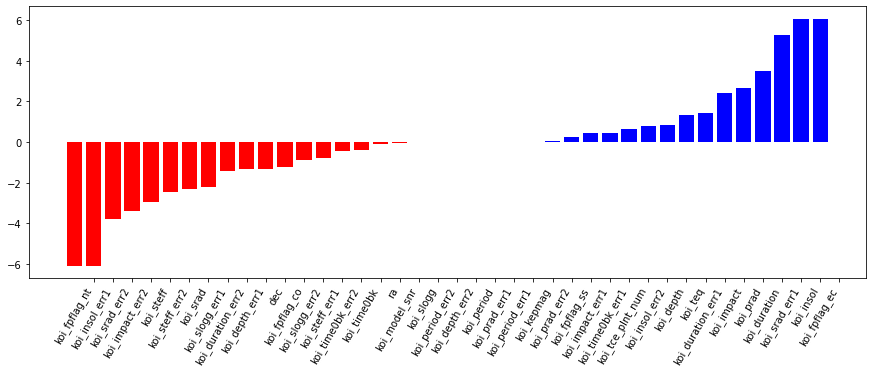

In [48]:
plot_coefficients(model, cv.get_feature_names(), 20,0)

classifier.coef type <class 'numpy.ndarray'>
classifier.coef [[-1.30327587e+00  8.54546391e-01 -1.32137708e+00  0.00000000e+00
   3.49945310e+00  1.42733593e+00 -1.42733593e+00 -1.20455696e+00
   6.08199203e+00 -6.08199203e+00  2.37683530e-01  2.40275318e+00
   4.26820930e-01 -3.38271713e+00  6.07933030e+00 -6.07933030e+00
   8.02825499e-01  2.54120195e-02 -2.54120195e-02  7.69573131e-03
   2.32954123e-02 -5.24988522e-03  2.68035360e+00  1.85976764e-02
   4.73019016e-02 -1.67712425e-02 -2.18852168e+00 -8.85870881e-01
  -2.30924115e+00  5.25567639e+00 -3.78979745e+00 -2.95560081e+00
  -7.70936396e-01 -2.45835113e+00  6.45928559e-01  1.31583647e+00
  -3.99453790e-01  4.33773951e-01 -4.46761972e-01 -9.82858204e-02]
 [-2.00029792e+00 -2.00009684e+00 -2.00046141e+00 -1.99997071e+00
   2.33938281e-04  2.63227358e-05 -2.63227358e-05  1.90167426e-04
   6.23638802e-06 -6.23638802e-06 -2.16708714e-02 -2.50113886e-04
  -1.31192518e-02 -3.03396898e-04  1.17161991e-05 -1.17161991e-05
  -2.78374043e

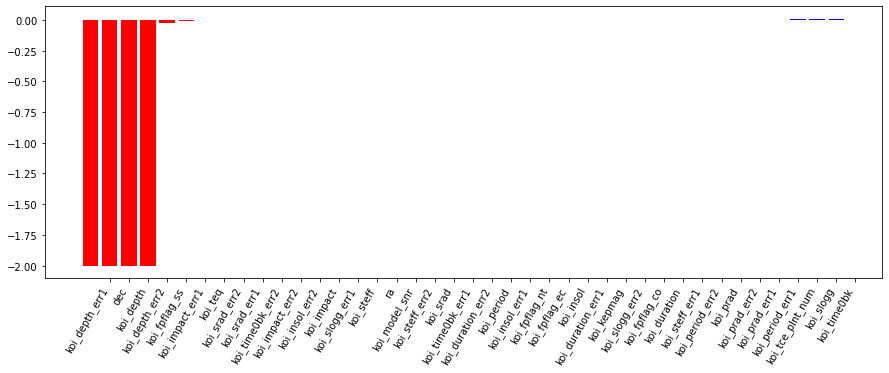

In [49]:
plot_coefficients(model, cv.get_feature_names(), 20, 1)

classifier.coef type <class 'numpy.ndarray'>
classifier.coef [[-1.30327587e+00  8.54546391e-01 -1.32137708e+00  0.00000000e+00
   3.49945310e+00  1.42733593e+00 -1.42733593e+00 -1.20455696e+00
   6.08199203e+00 -6.08199203e+00  2.37683530e-01  2.40275318e+00
   4.26820930e-01 -3.38271713e+00  6.07933030e+00 -6.07933030e+00
   8.02825499e-01  2.54120195e-02 -2.54120195e-02  7.69573131e-03
   2.32954123e-02 -5.24988522e-03  2.68035360e+00  1.85976764e-02
   4.73019016e-02 -1.67712425e-02 -2.18852168e+00 -8.85870881e-01
  -2.30924115e+00  5.25567639e+00 -3.78979745e+00 -2.95560081e+00
  -7.70936396e-01 -2.45835113e+00  6.45928559e-01  1.31583647e+00
  -3.99453790e-01  4.33773951e-01 -4.46761972e-01 -9.82858204e-02]
 [-2.00029792e+00 -2.00009684e+00 -2.00046141e+00 -1.99997071e+00
   2.33938281e-04  2.63227358e-05 -2.63227358e-05  1.90167426e-04
   6.23638802e-06 -6.23638802e-06 -2.16708714e-02 -2.50113886e-04
  -1.31192518e-02 -3.03396898e-04  1.17161991e-05 -1.17161991e-05
  -2.78374043e

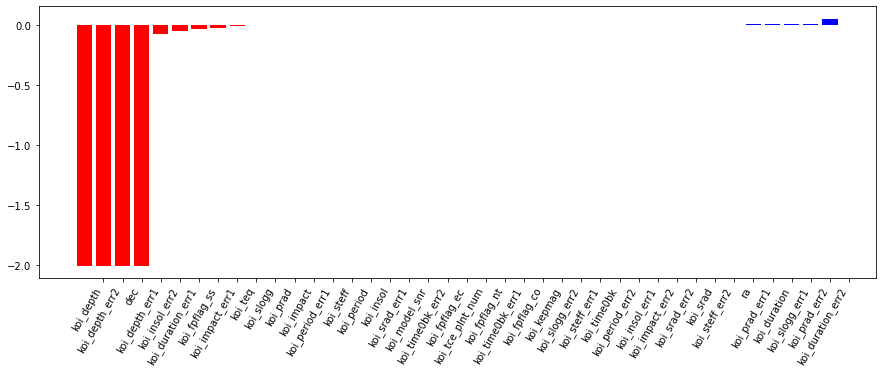

In [50]:
plot_coefficients(model, cv.get_feature_names(), 20, 2)

In [51]:
def f_importances(coef, names):
    imp = coef
    print(imp)
    print(names)
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

In [52]:
df_coef_0 = pd.DataFrame({'coef' : model.coef_[0],'abs(coef_)': abs(model.coef_[0]), 'name': columns})
df_coef_0=df_coef_0.sort_values('abs(coef_)', ascending = False)[-20:].reset_index()
df_coef_0

,index,coef,abs(coef_),name
0,27,-0.885871,0.885871,koi_tce_plnt_num
1,1,0.854546,0.854546,koi_fpflag_ss
2,16,0.802825,0.802825,koi_depth
3,32,-0.770936,0.770936,koi_slogg_err1
4,34,0.645929,0.645929,koi_srad
5,38,-0.446762,0.446762,dec
6,37,0.433774,0.433774,ra
7,12,0.426821,0.426821,koi_impact_err2
8,36,-0.399454,0.399454,koi_srad_err2
9,10,0.237684,0.237684,koi_impact


In [53]:
df_coef_1 = pd.DataFrame({'coef' : model.coef_[1],'abs(coef_)': abs(model.coef_[1]), 'name': columns})
df_coef_1=df_coef_1.sort_values('abs(coef_)', ascending = False)[-20:].reset_index()
df_coef_1

,index,coef,abs(coef_),name
0,16,-0.000278,0.000278,koi_depth
1,11,-0.000250,0.000250,koi_impact_err1
2,4,0.000234,0.000234,koi_period
3,26,-0.000232,0.000232,koi_model_snr
4,31,-0.000231,0.000231,koi_slogg
5,39,-0.000193,0.000193,koi_kepmag
6,7,0.000190,0.000190,koi_time0bk
7,27,0.000190,0.000190,koi_tce_plnt_num
8,17,0.000172,0.000172,koi_depth_err1
9,18,-0.000172,0.000172,koi_depth_err2


In [54]:
df_coef_2 = pd.DataFrame({'coef' : model.coef_[2],'abs(coef_)': abs(model.coef_[2]), 'name': columns})
df_coef_2=df_coef_2.sort_values('abs(coef_)', ascending = False)[-20:].reset_index()
df_coef_2

,index,coef,abs(coef_),name
0,33,0.001414,0.001414,koi_slogg_err2
1,19,-0.001383,0.001383,koi_prad
2,28,0.001277,0.001277,koi_steff
3,30,0.001202,0.001202,koi_steff_err2
4,13,0.001066,0.001066,koi_duration
5,14,-0.000992,0.000992,koi_duration_err1
6,15,0.000992,0.000992,koi_duration_err2
7,21,0.000875,0.000875,koi_prad_err2
8,29,-0.000833,0.000833,koi_steff_err1
9,36,0.000822,0.000822,koi_srad_err2


In [55]:
#out of the bottom 20 coefficients in each of the 3 classes these below are the ones common to all three.
df_least_important = df_coef_0.merge(df_coef_1, on = 'name', how = 'inner').merge(df_coef_2, on = 'name', how = 'inner')

In [56]:
least_important_list = df_least_important['name'].to_list()
least_important_list

['koi_tce_plnt_num', 'ra', 'koi_depth_err2', 'koi_depth_err1', 'koi_prad']

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [ ]:
# Create the GridSearchCV model

In [ ]:
# Train the model with GridSearch

In [ ]:
print(grid2.best_params_)
print(grid2.best_score_)

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)